In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from learntools.deep_learning.decode_predictions import decode_predictions
from IPython.display import Image, display
import numpy as np

In [10]:
num_classes = 8
my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=None))
my_new_model.add(Dense(num_classes, activation='softmax'))
my_new_model.layers[0].trainable = False

my_new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        'dataset/kaggle',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        'dataset/kaggle',
        target_size=(image_size, image_size),
        class_mode='categorical')

Found 5558 images belonging to 8 classes.
Found 5558 images belonging to 8 classes.


In [12]:
print(train_generator.class_indices)

{'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happiness': 4, 'neutrality': 5, 'sadness': 6, 'surprise': 7}


In [13]:
history = my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        validation_data=validation_generator,
        validation_steps=1)

2023-07-12 08:22:10.921466: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14450688 exceeds 10% of free system memory.
2023-07-12 08:22:11.978461: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15235200 exceeds 10% of free system memory.
2023-07-12 08:22:12.009175: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 77070336 exceeds 10% of free system memory.
2023-07-12 08:22:12.482388: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 77070336 exceeds 10% of free system memory.
2023-07-12 08:22:12.741126: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 77070336 exceeds 10% of free system memory.
2023-07-12 08:22:16.926275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{nod

3/3 [==============================] - ETA: 0s - loss: 2.8291 - accuracy: 0.2222

2023-07-12 08:22:33.338018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 22s 6s/step - loss: 2.8291 - accuracy: 0.2222 - val_loss: 2.1862 - val_accuracy: 0.0625


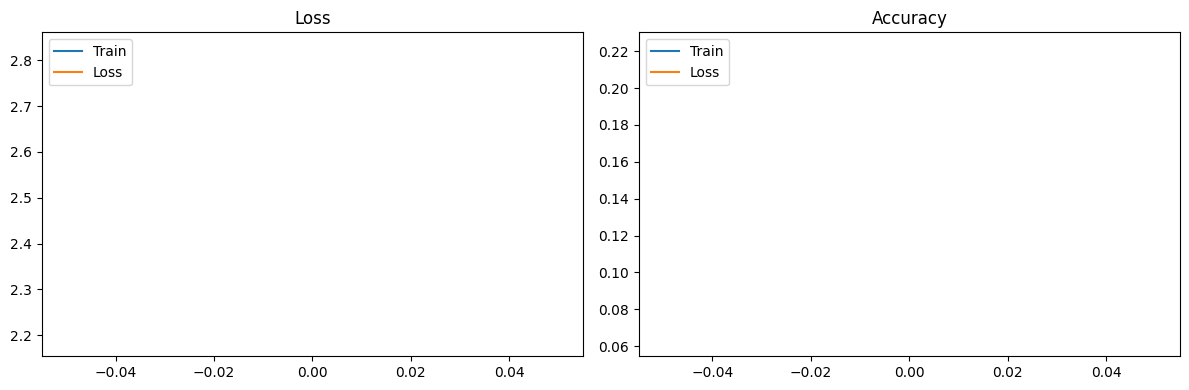

In [15]:
import matplotlib.pyplot as plt

# Plot the loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(["Train", "Loss"], loc="upper left")
plt.title('Loss')

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(["Train", "Loss"], loc="upper left")
plt.title('Accuracy')

plt.tight_layout()
plt.show()

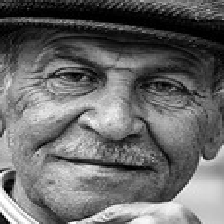

[0.18858773 0.06996411 0.20679376 0.15761194 0.06069943 0.19757408
 0.01982161 0.09894736]
disgust: 20.679375529289246%
neutrality: 19.757407903671265%
anger: 18.85877251625061%
fear: 15.761193633079529%
surprise: 9.894736111164093%
contempt: 6.996411085128784%
happiness: 6.069942936301231%
sadness: 1.9821610301733017%


In [17]:
img_path = 'dataset/kaggle/happiness/17017229733_454ede7bf6_n_face.png'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
test_data = preprocess_input(img_array)
preds = my_new_model.predict(np.array([test_data]))
display(Image(img_path))
print(preds[0])
slov_res ={}
for i in train_generator.class_indices:
    slov_res[i] = preds[0][train_generator.class_indices[i]]
    

sorted_keys = sorted(slov_res, key=slov_res.get, reverse = True)
sorted_dict = {}
for w in sorted_keys:
    sorted_dict[w] = slov_res[w]
    
for i in sorted_dict:
    print(str(i) + ': ' + str(sorted_dict[i]*100) + '%')